This file processes and plots example output from GP Microbiome using functions and loops, then saves the results. It is written for output which results from inputting data without the values from one time point, then making a prediction for that time point to test the accuracy of the predictions. Originally I used CF study participant 708's data and withheld the last time point, then predicted the last time point and 3 time points into the future. For this example, I followed a similar pattern. 
<br>

This code may easily be edited for situations where more data has been withheld, or where predictions are made between time points. I have included comments indicating what the original code looked like, as the only difference is the file names and the fact that the data were not randomly generated.
This code can also easily be adapted to plot output from other algorithms in situations where predictions have been made and validated with a leave-one-out scenario.

See Plotsamples to plot data with all time points included.

In [1]:
#import necessary libraries 
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1
The first few cells create the OTUkey_named file. If the file has already been created, you can skip down to Section 2.

In [2]:
#add a column for only the bacteria's genus name to the OTU key file
key = pd.read_excel("Data/OTUkey.xlsx")
#rename first column to avoid Excel mistaking it for a SYLK file due to the "ID" in the name
key.rename(columns={'ID_OTU': 'OTU'}, inplace=True)
key.head()

,OTU,Bacteria
0,OTU_1,D_0__Bacteria;D_1__Actinobacteria;D_2__Acidimi...
1,OTU_2,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...
2,OTU_3,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...
3,OTU_4,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...
4,OTU_5,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...


In [48]:
#extract the genus from the taxonomic information
pat = 'D_5__(?P<Name>.*)'
key=key.join(key.Bacteria.str.extract(pat, expand=True))
key.head()

,OTU,Bacteria,Name
0,OTU_1,D_0__Bacteria;D_1__Actinobacteria;D_2__Acidimi...,uncultured bacterium
1,OTU_2,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Actinomyces
2,OTU_3,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Bifidobacterium
3,OTU_4,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Scardovia
4,OTU_5,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,NaN


In [49]:
#replace NaN, which occurs where the genus is "Other", with the word "Other"
key['Name'].fillna('Other', inplace=True)
key.head()
#save edited file
key.to_csv("Data/OTUkey_named.csv", index=False)

,OTU,Bacteria,Name
0,OTU_1,D_0__Bacteria;D_1__Actinobacteria;D_2__Acidimi...,uncultured bacterium
1,OTU_2,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Actinomyces
2,OTU_3,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Bifidobacterium
3,OTU_4,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Scardovia
4,OTU_5,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Other


## Section 2
Read in the OTUkey_named file below if it already exists.

In [64]:
#read in OTUkey_named file, if it has already been created 
key=pd.read_csv("Data/OTUkey_named.csv")

In [65]:
#make a list of the OTU IDs for our bacteria of interest
bacteria=[2,30,58,59,60,63,70,80,94,104,113,167,169,170,206,221,223,227,229,234]

## Section 3
This section creates a second version of the OTUkey_named file for selected bacteria for use in other programs, and can also be skipped once you have the file. We will use a version of the OTUkey_named_selection file, with plot specifcations added, in DTW_All_boxplots, where we create boxplots of the TIME Dynamic Time Warping output.

In [52]:
#this cell can be skipped if the OTUkey_selection_named file already exists, as it is not used in this particular program.
#creating a second key for selected bacteria
selectkey=key.iloc[[i-1 for i in bacteria],:]
selectkey.head()
#saving the select key for later use in other programs
selectkey.to_csv("Data/OTUkey_selection_named.csv", index=False)

,OTU,Bacteria,Name
1,OTU_2,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Actinomyces
29,OTU_30,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,Rothia
57,OTU_58,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,Porphyromonas
58,OTU_59,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,Alloprevotella
59,OTU_60,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,Prevotella


## Section 4: How I generated the additional example output files

First we read in our example output file for fictional participant 480, who had the most time points. This example file is intended to resemble real output and is not actually the results of running GP Microbiome. Had it been, it would have been generated from the raw output in the program readsample27. I have included in this repository both the example files and a full explanation of how I created them, for those who are interested. 
<br>

Our goal is to create a second version of this file, with the last 'time point' excluded and predicted for. Since the original file was carefully designed to resemble our output and not be totally random, we can easily create this second version simply by applying random weights to the values and normalizing them to sum to 1. 

In [2]:
df=pd.read_csv("Data/480.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,118.000000,368.000000,555.000000,695.0,909.00000,1041.000000,1181.000000,1303.000000,1493.000000,1723.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.065207,0.090098,0.000916,0.032287,0.0,0.02717,0.022772,0.018458,0.005117,0.088971,0.013744
3,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
#apply the random weights and normalize
np.random.seed(1)
from sklearn.preprocessing import normalize
c = normalize(df.iloc[1:,:10].to_numpy()*np.random.uniform(low=.5, high=1.5, size=(245,len(df.columns)-1)), axis=0, norm='l1')
c

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04496702, 0.11757285, 0.00059739, ..., 0.020904  , 0.00309807,
        0.07133911],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04420482, 0.        , 0.00131651, ..., 0.00194953, 0.00168603,
        0.        ]])

In [11]:
#convert back to a data frame, adding the first row back in (without the last column)
df2=pd.DataFrame(c)
df3=pd.DataFrame(np.insert(df2.values, 0, values=df.iloc[0,:10].to_list(), axis=0))
df3.to_csv('Data/480b.csv', index=False)
df3.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,118.000000,368.000000,555.000000,695.0,909.00000,1041.000000,1181.000000,1303.000000,1493.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.044967,0.117573,0.000597,0.042817,0.0,0.03057,0.021345,0.020904,0.003098,0.071339
3,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000


In [26]:
np.random.seed(2)
y=df.iloc[1:,10].to_numpy()
x=normalize(y.repeat(4).reshape((245,4))*np.random.uniform(low=.5, high=1.5, size=(245,4)),axis=0, norm='l1')
#alternative code, with same result using np.resize instead of np.reshape
#x=normalize(np.resize(y.T,(4,245)).T*np.random.uniform(low=.5, high=1.5, size=(245,4)),axis=0, norm='l1')
x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.40179003e-02, 1.01525181e-02, 1.38235274e-02, 1.67026608e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

In [39]:
#Combine the two data frames. Check the head to confirm that it looks right.
pred_df=pd.DataFrame(x)
pred_df2=pd.DataFrame(np.insert(pred_df.values, 0, values=[180*i+df.iloc[0,10] for i in range(4)], axis=0),columns=[i for i in range(len(df.columns)-1, len(df.columns)+3)])
dfboth = pd.concat([df3, pred_df2], axis=1, sort=False)
dfboth.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,118.000000,368.000000,555.000000,695.0,909.00000,1041.000000,1181.000000,1303.000000,1493.000000,1723.000000,1903.000000,2083.000000,2263.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.044967,0.117573,0.000597,0.042817,0.0,0.03057,0.021345,0.020904,0.003098,0.071339,0.014018,0.010153,0.013824,0.016703
3,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
dfboth.to_csv("Data/480b_both.csv", index=False)

In [47]:
#It's unlikely that you will need a file of just the predicted values, but here is the code to save it if you do:
pred_df3=dfboth.iloc[:,len(df.columns)-1:]
pred_df3.head()
#pred_df3.to_csv("Data/480_pred.csv", index=False)

,10,11,12,13
0,1723.000000,1903.000000,2083.000000,2263.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.014018,0.010153,0.013824,0.016703
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000


## Section 5: Plots
Read the files into dictionaries and plot them with functions. The dictionaries are to facilitate plotting multiple particpants' output at once in loops. If you only have one file, you can run the function on just that participant ID or create a 1-item dictionary. If you really don't want to bother with dictionaries, you can read each file in manually and use them as parameters for the functions in Section 6. See Section 7 for the code to create legends, with options to save the legends as separate files (my preferred method for the CF output data) or to copy and paste into any of the functions in Section 5 and 6 at the indicated places.

## Part A: Read in files

In [48]:
#create a list for the ID numbers of the participants whose data we ran through GP Microbiome with a time point excluded
#in our case, there's only one, but it's written this way to facilitate plotting more than one
IDs=['480']
#Create dictionaries and read in each person's output for noise free compositions without predictions, 
#and both with and without predictions. We showed how to generate 480's example files in Section 4. 
#recall that my files for leave-one-out data differ in name from the ones for data with all time points only by the letter 'b' 
#I kept up this convention of simply adding a 'b' in the output from the program as well.
dfs = {i: pd.read_csv('Data/{}b.csv'.format(i)) for i in IDs}
both_dfs = {i: pd.read_csv('Data/{}b_both.csv'.format(i)) for i in IDs}


In [ ]:
#if we were running this on the CF Data, we would simply change the IDs list:
#IDs=['708']

In [ ]:
#check that it ran correctly by looking at the first few entries for one of the files without predictions
dfs['480'].head()  

In [ ]:
#check again that the code ran correctly by looking at the first few entries for one of the files with predictions
both_dfs['480'].head()

In [50]:
#rename the columns in the files containing both sets of time points based on the first row, which contains the time points
#reorder the columns in the files to make the time points consecutive, and put them in a new dictionary
reordered_dfs={}
for i in IDs:
    df=both_dfs[i].set_axis(both_dfs[i].loc[0].tolist(), axis=1, inplace=False)
    df=df.reindex(columns=sorted(df.columns))
    #save file if desired
    df.to_csv('Data/{}b_both_reordered.csv'.format(i), index=False)
    reordered_dfs[i]=df

In [ ]:
#check that the redordering code ran correctly by looking at the first few entries and comparing the head with the other two
reordered_dfs['480'].head()

In [52]:
#read in the files containing the observed relative abundance data for each participant, adding them to a new dictionary
#the columns are the age in days at the time of each sample, and we will use this information as well in the plots
rel_dfs = {i: pd.read_csv("Data/{}_Rel.csv".format(i)) for i in IDs}

In [53]:
#examine the head of one of the files to confirm it ran correctly
rel_dfs['480'].head()

,124,242,492,679,819,1033,1165,1305,1427,1617,1847
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001199,0.086987,0.000942,0.03484,0.013489,0.030132,0.030132,0.017891,0.006591,0.100753,0.015066
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Part B: Markers, two ways
In our plots, different coloured markers indicate a participant's clinical condition. There are two main ways of creating dictionaries for the markers: One is to import metadata and process it into dictionaries directly. The other is, after doing the first method once and saving the results to an Excel file (in my case, the same metadata file), to import those results into dictionaries. The first method is more flexible, since it goes directly to the metadata, but the code for the second has useful applications beyond this program. Easily generalised, it shows how to force Python to recognize lists from a saved file as lists rather than strings. 

## First Method: Creating markers directly

In [55]:
#read in the metadata file which includes the condition and time delta for each participant's samples 
status=pd.read_excel("Data/ExampleDeltaKey.xlsx", sheet_name="Metadata and time deltas")
#for the CF Data, the name of the file is 'MetaDataKey.xlsx'
#otherwise, the code is identical

In [56]:
#create a dictionary which, for each participant, lists the time deltas for samples taken while stable
S_list={}
for i in [int(x) for x in IDs]:
    #convert to a list, for each ID, the entries in the Time_Delta column for which the Visit_type was 'Stable'
    S_list[i]=list(status.query('Participant == {} and Visit_type == "Stable"'.format(i))['Time_Delta'])
#display to confirm
S_list

{480: [118, 368, 909, 1303, 1493]}

In [57]:
#create a dictionary which, for each participant, lists the time deltas for samples taken during exacerbations
E_list={}
for i in [int(x) for x in IDs]:
    #convert to a list, for each ID, the entries in the Time_Delta column for which the Visit_type was 'Exacerbation'
    E_list[i]=list(status.query('Participant == {} and Visit_type == "Exacerbation"'.format(i))['Time_Delta'])
#display to confirm
E_list

{480: [0, 555, 695, 1041, 1181, 1723]}

In [68]:
#make a dictionary depicting the order of the values in the lists contained in S_list, which will be for green markers
#these are for use with plots without predictions
#this corresponds to column names in the 'dfs' dictionary, which are simple index values 
markers_gdict={}
for i in IDs:
    markers_gdict[i]=[int(col) for col in dfs[i].columns if dfs[i][col][0] in S_list[int(i)]]
#make a dictionary depicting the order of the values in the lists contained in E_list, which will be for red markers
markers_rdict={}
for i in IDs:
    markers_rdict[i]=[int(col) for col in dfs[i].columns if dfs[i][col][0] in E_list[int(i)]]
#display to confirm
markers_gdict, markers_rdict

({'480': [1, 2, 5, 8, 9]}, {'480': [0, 3, 4, 6, 7]})

In [ ]:
#make a dictionary depicting the order of the values in the lists contained in S_list, which will be for green markers
#these are for use with plots with predictions
#this corresponds to index values of column names in the 'reordered_dfs' dictionary 
#which are time deltas for both actual and predicted values
#if you did not predict between samples, you can use markers_g again for these plots
markers_g1dict={}
for i in IDs:
    markers_g1dict[i]=[reordered_dfs[i].columns.get_loc(col) for col in reordered_dfs[i].columns 
                    if reordered_dfs[i][col][0] in S_list[int(i)]]
#make a dictionary depicting the order of the values in the lists contained in E_list, which will be for red markers
#if you did not predict between samples, you can use markers_r again for these plots
markers_r1dict={}
for i in IDs:
    markers_r1dict[i]=[reordered_dfs[i].columns.get_loc(col) for col in reordered_dfs[i].columns 
                    if reordered_dfs[i][col][0] in E_list[int(i)]]
#display to confirm
markers_g1dict, markers_r1dict

In [ ]:
#convert to a data frame
data={'markers_r': markers_rdict, 'markers_g': markers_gdict, 'markers_r1':markers_r1dict, 'markers_g1':markers_g1dict}
#make it oriented with participants as columns and the names of the dictionaries as rows
df=pd.DataFrame.from_dict(data, orient='index')
#view the head
df.head()

In [ ]:
#write the data frame with the markers to a new sheet in our metadata file
#import libraries to write to Excel 
import os
from openpyxl import load_workbook
file_name="Data/ExampleDeltaKey.xlsx"
#again, the only difference in the code for the CF data is the file name, 'MetaDataKey.xlsx'
#open the file
writer = pd.ExcelWriter(file_name, engine='openpyxl')
if os.path.exists(file_name):
    book = load_workbook(file_name)
    writer.book = book
#check if the sheet already exists, and if it does then close the file    
if 'markers' in book.sheetnames:
    writer.close()
else:
    #create the new sheet in the existing file and save
    df.to_excel(writer, sheet_name='markers')
    writer.save()
    writer.close()

## Second Method: Import markers from file

In [67]:
#import literal_eval for use with the markers file
from ast import literal_eval

In [59]:
#read in the file with the lists of markers based on whether the participant is exacerbated or stable at a given time point
#markers can indicate any condition, depending on your data, but you need separate lists for different conditions
markers=pd.read_excel("Data/ExampleDeltaKey.xlsx", sheet_name="markers")
#For the CF data, we would change the file name to 'MetaDataKey.xlsx'
#view the columns, which will be strings of the ID numbers if you generated them with the code above
#if for some reason you entered them manually in Excel you need to map them to strings as follows:
#markers.columns=markers.columns.map(str)
markers.columns

Index(['Unnamed: 0', '405', '453', '480', '500', '511'], dtype='object')

In [13]:
#force the program to view the lists from the Excel file as lists rather than as strings
for i in range(1,len(markers.columns)):
    markers.iloc[:,i]=markers.iloc[:,i].apply(lambda x: literal_eval(x))

In [ ]:
#create dictionaries from the columns, pairing each participant with its markers 
#for use with the output without predictions (in the dfs dictionary) 
#if you don't need all the columns, you can use this code anyway or use the alternative code below
#start with green (stable) markers for the output without predictions (in the dfs dictionary)
markers_gdict=markers.iloc[0,1:].to_dict()
#repeat for the red (exacerbated) markers for the same output
markers_rdict=markers.iloc[2,1:].to_dict()
#display to confirm, if desired
markers_gdict, markers_rdict

In [60]:
#alternatively, make the dictionary just for participants you are plotting - it takes a couple more lines, but avoids 
#having unnecessary items in your dictionary
markers_gdict={}
markers_rdict={}
for i in IDs:
    markers_gdict[i]=markers.loc[0,i]
    markers_rdict[i]=markers.loc[2,i]
#display to confirm, if desired
markers_gdict, markers_rdict

({'480': '[1, 2, 5, 8, 9]'}, {'480': '[0, 3, 4, 6, 7, 10]'})

In [ ]:
#repeat for the output including predictions (reordered_dfs dictionary)
#these only differ from the markers_r and markers_g lists if between-time point predictions are made
#when we excluded 480's last time point, we only predicted into the future, so this code was not needed
#the program is written with the assumption that you don't need these markers
#I leave it here in case you want to edit this program to include between-samples predictions in withhold-test-accuracy plots
markers_g1dict=markers.iloc[1,1:].to_dict()
#repeat for the green (stable) markers to be used with the output including predictions (reordered_dfs dictionary)
#these also only differ from the marker_r lists if between-time point predictions are made
markers_r1dict=markers.iloc[3,1:].to_dict()
#display to confirm
markers_g1dict, markers_r1dict

In [ ]:
#again, this program assumes you don't need markers_g1 and markers_r1, but can easily be edited to use them
#if you do want to use them, but you don't need all the columns and don't want an oversized dictionary:
markers_g1dict={}
markers_r1dict={}
for i in IDs:
    markers_g1dict[i]=markers.loc[1,i]
    markers_r1dict[i]=markers.loc[3,i]
#display to confirm
markers_g1dict, markers_r1dict

## Part C: Creating the plots

My plotting functions create as many as 20 plots per participant, and when run in loops they plot all participants' data at the same time. Before running such a function, always make sure that your input data is formatted consistently for each participant, to ensure that the plots show what they are intended to show.
<br>

All of my plotting functions are written to save the plots to a folder called 'Plots,' which is in this repository as well. Adjust the file path if you want to save them somewhere else, or comment out the line of code which saves them if it isn't a comment already. 

In [61]:
#define custom colours for the plots - light and dark red and green, for noise-free and observed values respectively
l_red='#FF5959'
d_red='#A40000'
l_green='#14AE0E'
d_green='#0B5A08'

First, we have a function for use in a loop with the dictionaries, plotting without predictions. Although you may not feel the need to save these, you may want to see them to note how they differ from the corresponding plots using all time points. Because of how GP Microbiome works, output from a smaller input data set will look similar but not identical at each common time point, and seeing how things change provides insight about the withheld data. These plots only differ from the first parts of the plots with predictions if you predicted between time points. Plots with predictions follow.

In [62]:
def plot_loop(name):
    #divide the list of bacteria of interest into groups of 4 to facilitate plotting
    rows=[[2,30,58,59],[60,63,70,80],[94,104,113,167],[169,170,206,221],[223,227,229,234]]
    s=dfs[name]
    rel=rel_dfs[name]
    days=[int(x) for x in rel.columns]
    markers_r = markers_rdict[name]
    markers_g = markers_gdict[name]
    ID=int(name) 
    #run a loop to plot each group of 4 in a 2 by 2 format with our custom markers, then save the file
    for j in range(0,5):
        fig = plt.figure(figsize=(18,14))
        for i in range(0,4):
            ax = fig.add_subplot(2,2,i+1)
            #because I made my markers slightly transparent, I need separate plots for lines and red markers
            #this avoids having the line become transparent
            #slightly transparent markers make it easier to see subtle differences between the lines 
            #if you opt to set alpha at the default of 1 (not transparent), you can combine the first two red plots this way:
            #ax.plot(days, s.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red, markersize=8, 
                    #linewidth=2,dashes=[2, 2,5,2], c='black')
            #there is no built-in way to customise marker colours by variables, so the green markers need a dummy line regardless of alpha
            ax.plot(days, s.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor='none',markersize=8, 
                    linewidth=2,dashes=[2, 2,5,2], c='black')
            ax.plot(days, s.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red, alpha=0.75, 
                    markersize=8,c='none')
            ax.plot(days, s.iloc[rows[j][i]],'-gD', markevery=markers_g, markerfacecolor=l_green,alpha=0.75,
                    markersize=8, c='none')
            #again, if you prefer alpha=1 you can combine the two lines for red markers:
            #ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red, markersize=8, 
                    #linewidth=2, c='black')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor='none',markersize=8, 
                    linewidth=2, c='black')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red,alpha=0.75, markersize=8, 
                    c='none')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_g,markerfacecolor=d_green,alpha=0.75, markersize=8, 
                    c='none')
            #optional: insert code from Section 6 to add a legend for each plot - you'll probably need to adjust it if you do
            plt.title('{} Composition'.format(key['Name'][rows[j][i]-1]), size=15)
            plt.xlabel("Age (Days) of Participant {}".format(ID), size=13)
            plt.ylabel("Relative Abundance", size=13)
            #plt.savefig(r"F:\CF\Data\GPMicrobiome Data\{}b_{}.png".format(ID,j), format='png')
        plt.show()

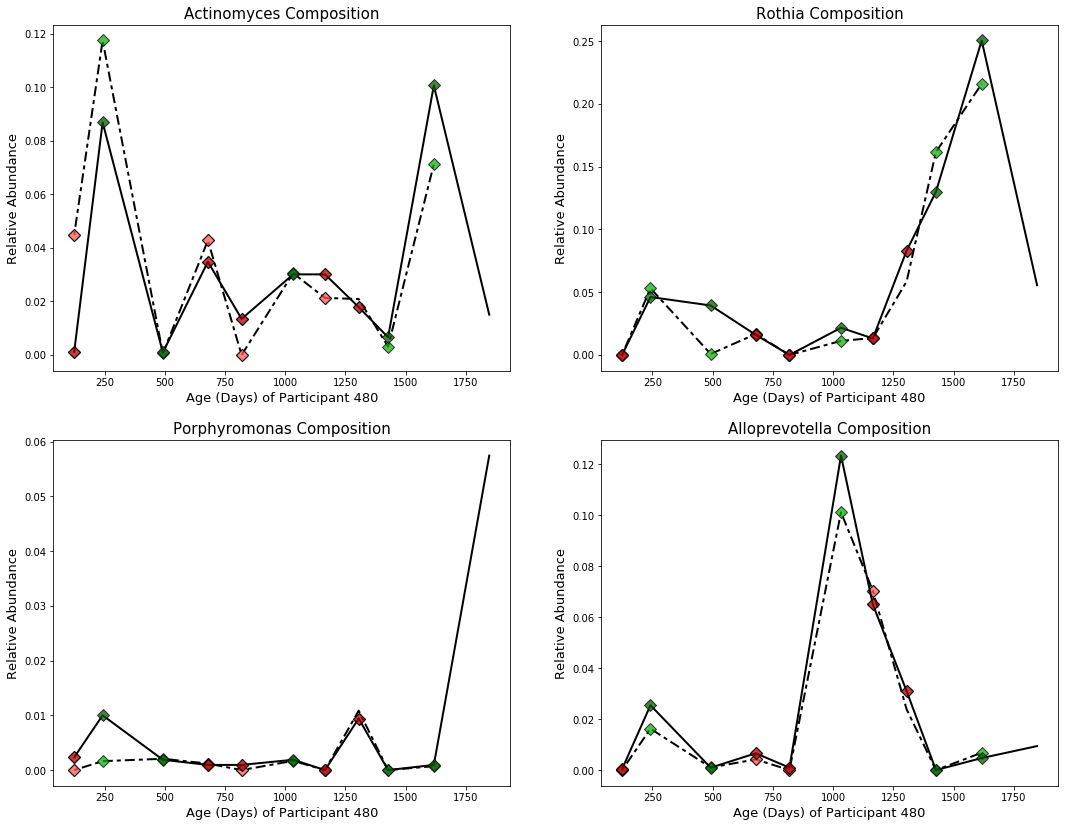

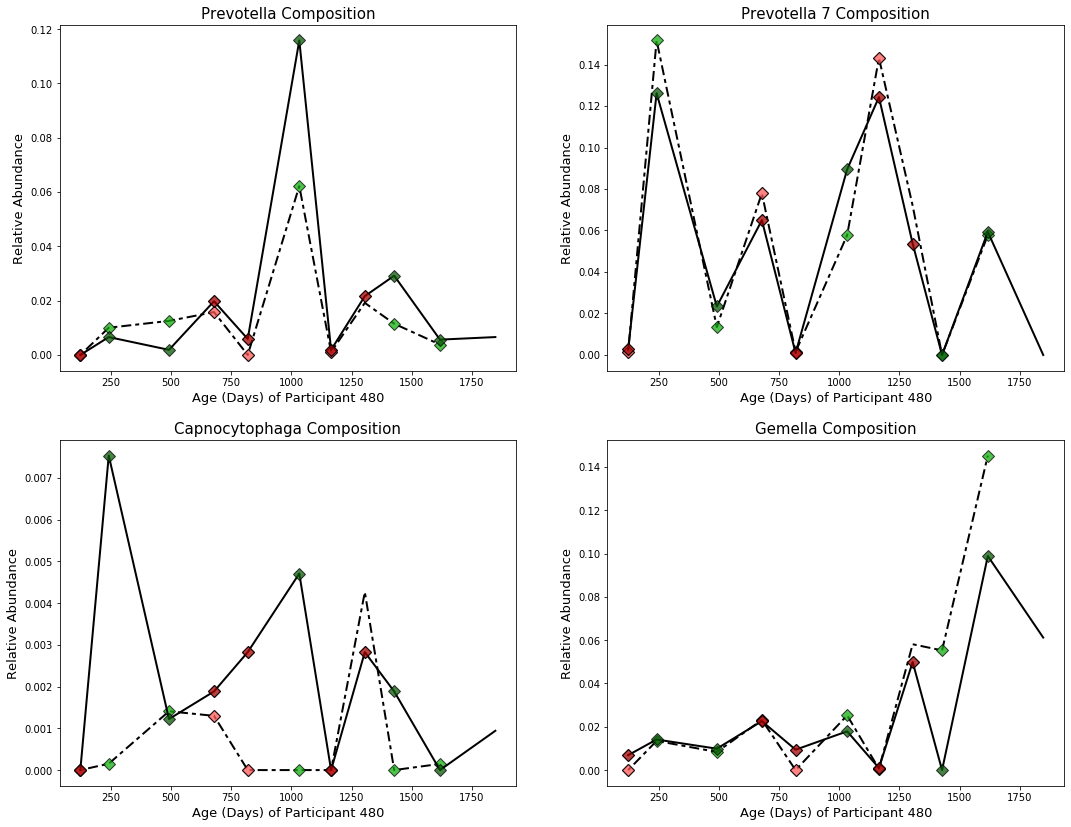

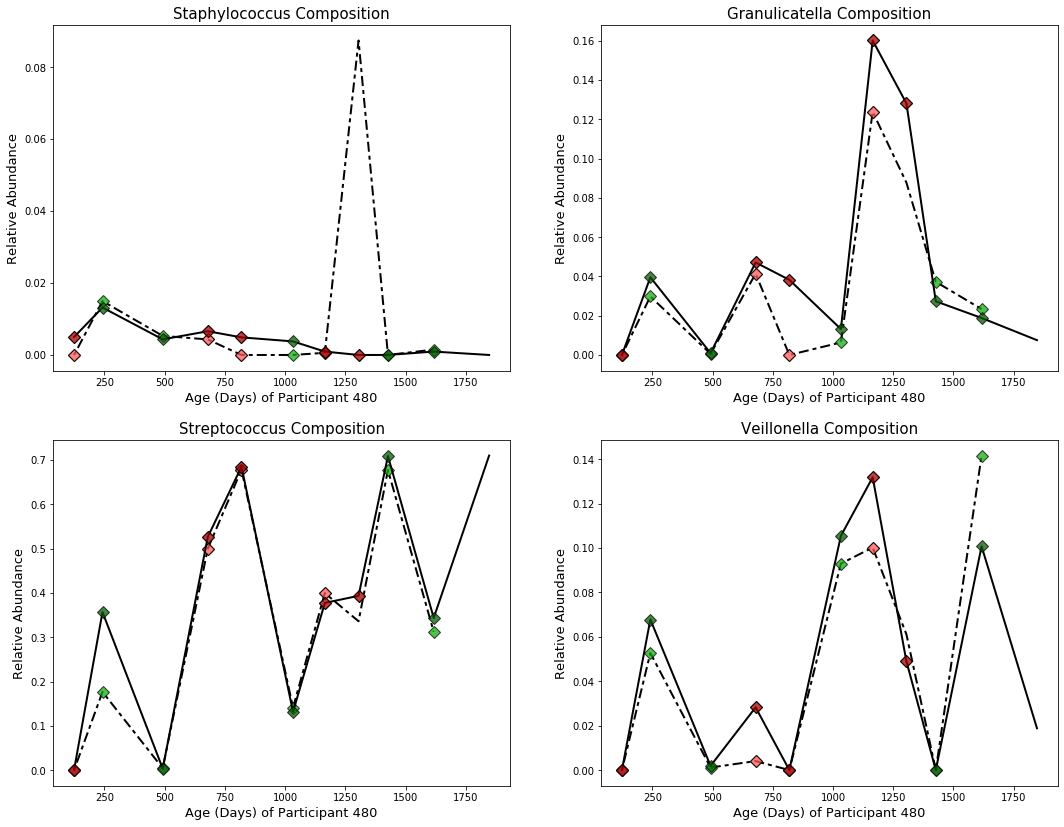

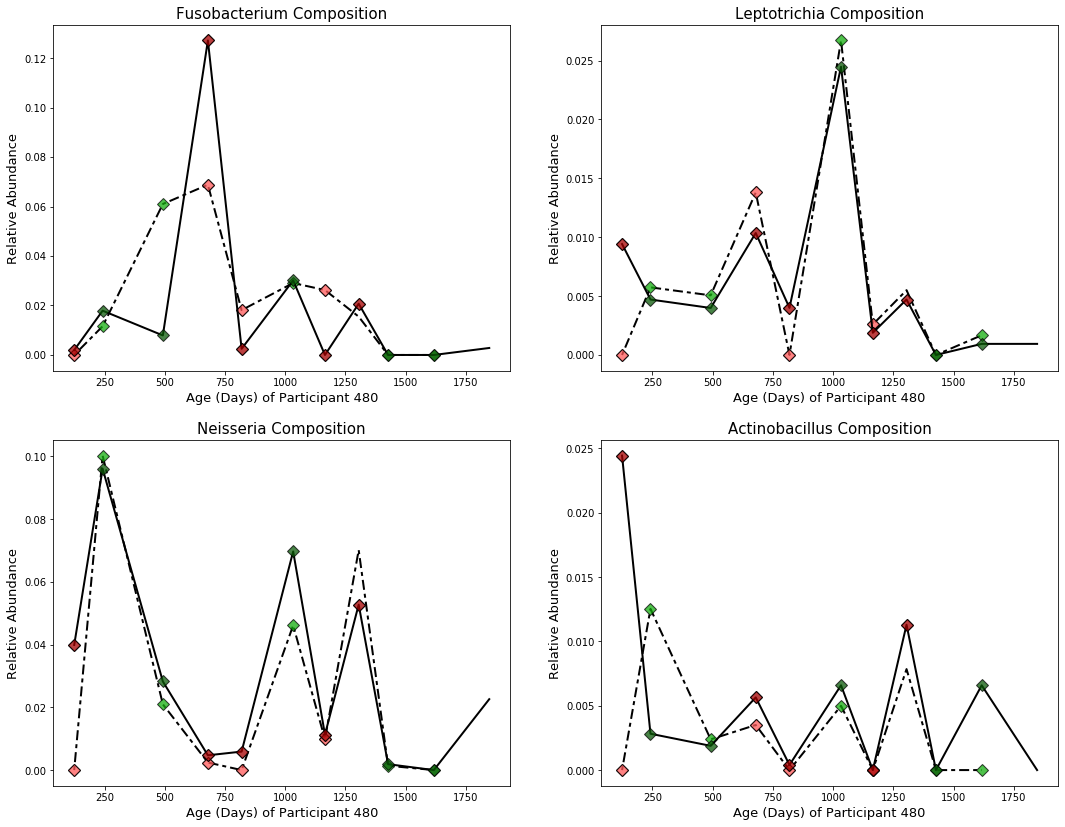

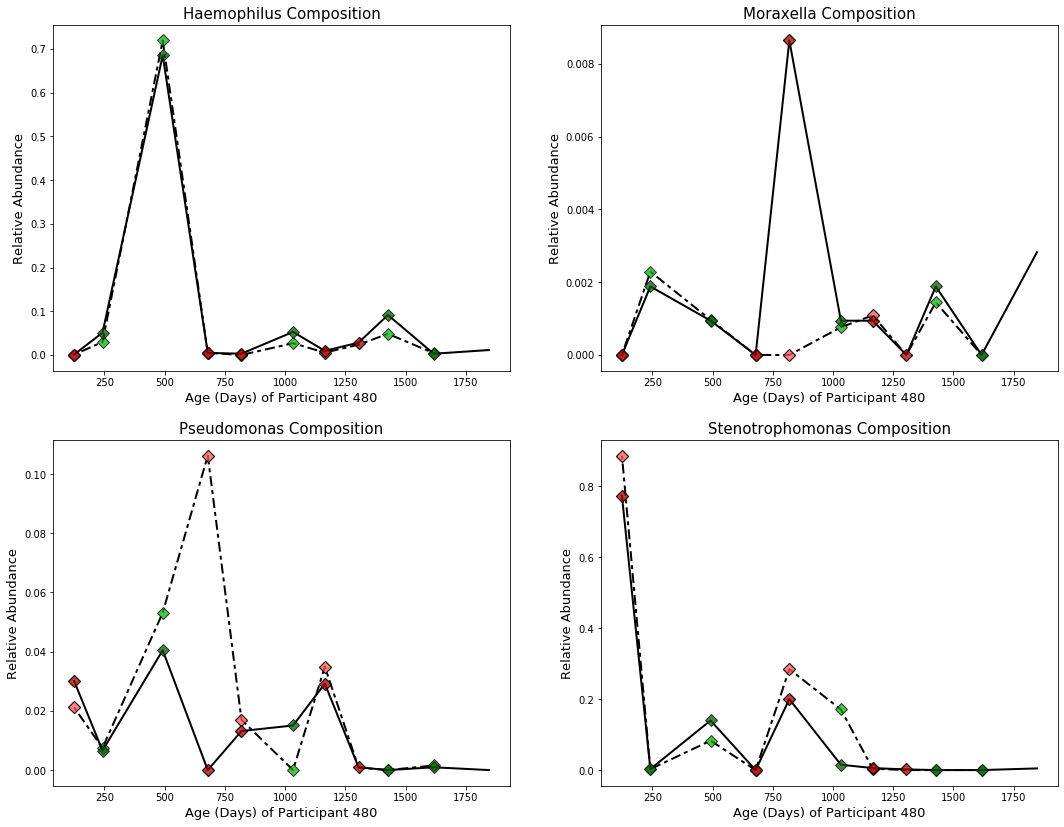

In [69]:
#run the first function in a loop
for name in IDs:
    plot_loop(name)

All subsequent plots in this section contain predictions.

In [26]:
#function to plot with predictions,for use in a loop with the dictionaries
def plot_pred_loop(name):
    #divide the list of bacteria of interest into groups of 4 to facilitate plotting
    rows=[[2,30,58,59],[60,63,70,80],[94,104,113,167],[169,170,206,221],[223,227,229,234]]
    r=reordered_dfs[name]
    rel=rel_dfs[name]
    days=[int(x) for x in rel.columns]
    markers_r = markers_rdict[name]
    markers_g = markers_gdict[name]
    #if you did between-samples predictions, you can enter your extra markers here and use those in the plots of the 'r' data frame
    #markers_r1 = markers_r1dict[name]
    #markers_g1 = markers_g1dict[name]
    ID=int(name) 
    #run a loop to plot each group of 4 in a 2 by 2 format with our custom markers, then save the file
    for j in range(0,5):
        fig = plt.figure(figsize=(18,14))
        for i in range(0,4):
            ax = fig.add_subplot(2,2,i+1)
            #because I made my markers slightly transparent, I need separate plots for lines and red markers
            #this avoids having the line become transparent
            #slightly transparent markers make it easier to see subtle differences between the lines
            #if you opt to set alpha at the default of 1 (not transparent), you can combine the first two red plots:
            #ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red,markersize=8, 
                    #linewidth=2,dashes=[2, 2,5,2], c='black')                
            #there is no built-in way to customise marker colours by variables, so the green and yellow markers always need a dummy line            
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor='none',markersize=8, 
                    linewidth=2,dashes=[2, 2,5,2], c='black')
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red, alpha=0.75, 
                    markersize=8, c='none')
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gD', markevery=markers_g, markerfacecolor=l_green,alpha=0.75,
                    markersize=8, c='none')
            #a square yellow marker shows the prediction for the time point which was withheld
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gs', markevery=[markers_r[-1]], markerfacecolor='yellow', alpha=0.9, 
                    markersize=11, c='none')
            #again, if you prefer alpha=1 you can combine the two lines for red markers:
            #ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red, markersize=8, 
                    #linewidth=2, c='black')
            ax.plot(days, rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor='none',markersize=8, 
                    linewidth=2, c='black')
            ax.plot(days, rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red, alpha=0.75, markersize=8, 
                    c='none')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_g,markerfacecolor=d_green,alpha=0.75, markersize=8, 
                    c='none')
            #optional: insert code from Section 6 to add a legend for each plot - you'll probably need to adjust it if you do
            plt.title('{} Composition with Predictions'.format(key['Name'][rows[j][i]-1]), size=15)
            plt.xlabel("Age (Days) of Participant {}".format(ID), size=13)
            plt.ylabel("Relative Abundance", size=13)
            plt.savefig(r"F:\CF\Data\GPMicrobiome Data\{}b_pred_{}.png".format(ID,j), format='png')
        plt.show()

In [ ]:
#run the function with predictions in a loop
for name in IDs:
    plot_pred_loop(name)

In [28]:
#code to plot just the predictions for the 3 most important bacteria in a row
def plot_pred_rows(name):
    rows=[94,113,229]
    markers_r = markers_rdict[name]
    markers_g = markers_gdict[name]
    r=reordered_dfs[name]
    rel=rel_dfs[name]
    days=[int(x) for x in rel.columns]
    #if you did between-samples predictions, you can enter your extra markers here and use those in the plots of the 'r' data frame
    #markers_r1 = markers_r1dict[name]
    #markers_g1 = markers_g1dict[name]
    ID=int(name) 
    fig=plt.figure(figsize=(26,7))
    for i in range(0,3):
        ax = fig.add_subplot(1,3,i+1)
        #because I made my markers slightly transparent, I need separate plots for lines and red markers
        #this avoids having the line become transparent
        #slightly transparent markers make it easier to see subtle differences between the lines
        #if you opt to set alpha at the default of 1 (not transparent), you can combine the first two red plots:
        #ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red,markersize=8, 
                    #linewidth=2,dashes=[2, 2,5,2], c='black')                
        #there is no built-in way to customise marker colours by variables, so the green and yellow markers always need a dummy line          
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_r[:-1], markerfacecolor='none',markersize=8, 
                  linewidth=2,dashes=[2, 2,5,2], c='black')
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red, alpha=0.75, 
                markersize=8, c='none')
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_g, markerfacecolor=l_green, alpha=0.75,
                markersize=8, c='none')
        #a square yellow marker shows the prediction for the time point which was withheld 
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gs', markevery=[markers_r[-1]], markerfacecolor='yellow', alpha=0.9,
                markersize=11, c='none')
        #again, if you prefer alpha=1 you can combine the two lines for red markers:
        #ax.plot(days,rel.iloc[rows[i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red, markersize=8, 
                    #linewidth=2, c='black')
        ax.plot(days, rel.iloc[rows[i]-1],'-gD', markevery=markers_r,markerfacecolor='none',markersize=8, 
                  linewidth=2, c='black')
        ax.plot(days, rel.iloc[rows[i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red, alpha=0.75, markersize=8, 
                 c='none')
        ax.plot(days,rel.iloc[rows[i]-1],'-gD', markevery=markers_g,markerfacecolor=d_green,alpha=0.75, markersize=8, 
                   c='none')
        #optional: insert code from Section 6 to add a legend for each plot - you'll probably need to adjust it if you do
        plt.title('{} Composition with Predictions'.format(key['Name'][rows[i]-1]), size=24)
        plt.xlabel("Age (Days) of Participant {}".format(ID), size=18)
        plt.ylabel("Relative Abundance", size=18)
        plt.setp(ax.get_xticklabels(), size=14)
        plt.setp(ax.get_yticklabels(), size=14)
        #the tight_layout function reduces white space in the image. 
        #If you turn off tight_layout you may need to adjust your text size etc. 
        plt.tight_layout()        
        plt.savefig(r"F:\CF\Data\GPMicrobiome Data\{}b_pred_rows.png".format(ID), format='png')
    plt.show()

In [ ]:
#run the function
plot_pred_rows('480')

In [32]:
#plotting with prediction for 2 in a row - simple edit to plot_pred_rows
def plot_pred_two(name):
    rows=[94,229]
    markers_r = markers_rdict[name]
    markers_g = markers_gdict[name]
    r=reordered_dfs[name]
    rel=rel_dfs[name]
    days=[int(x) for x in rel.columns]
    #if you did between-samples predictions, you can enter your extra markers here and use those in the plots of the 'r' data frame
    #markers_r1 = markers_r1dict[name]
    #markers_g1 = markers_g1dict[name]
    ID=int(name) 
    fig=plt.figure(figsize=(15,6))
    for i in range(0,2):
        ax = fig.add_subplot(1,2,i+1)
        #because I made my markers slightly transparent, I need separate plots for lines and red markers
        #this avoids having the line become transparent
        #slightly transparent markers make it easier to see subtle differences between the lines
        #if you opt to set alpha at the default of 1 (not transparent), you can combine the first two red plots:
        #ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red,markersize=8, 
                    #linewidth=2,dashes=[2, 2,5,2], c='black')                
        #there is no built-in way to customise marker colours by variables, so the green and yellow markers always need a dummy line          
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_r[:-1], markerfacecolor='none',markersize=8, 
                  linewidth=2,dashes=[2, 2,5,2], c='black')
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red, alpha=0.75, 
                markersize=8, c='none')
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gD', markevery=markers_g, markerfacecolor=l_green, alpha=0.75,
                markersize=8, c='none')  
        #a square yellow marker shows the prediction for the time point which was withheld 
        ax.plot(r.loc[0]+days[0], r.iloc[rows[i]],'-gs', markevery=[markers_r[-1]], markerfacecolor='yellow', alpha=0.9,
                markersize=11, c='none')
        #again, if you prefer alpha=1 you can combine the two lines for red markers:
        #ax.plot(days,rel.iloc[rows[i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red, markersize=8, 
                    #linewidth=2, c='black')
        ax.plot(days, rel.iloc[rows[i]-1],'-gD', markevery=markers_r,markerfacecolor='none',markersize=8, 
                  linewidth=2, c='black')
        ax.plot(days, rel.iloc[rows[i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red, alpha=0.75, markersize=8, 
                 c='none')
        ax.plot(days,rel.iloc[rows[i]-1],'-gD', markevery=markers_g,markerfacecolor=d_green,alpha=0.75, markersize=8, 
                   c='none')
        #optional: insert code from Section 6 to add a legend for each plot - you'll probably need to adjust it if you do
        plt.title('{} Composition with Predictions'.format(key['Name'][rows[i]-1]), size=20)
        plt.xlabel("Age (Days) of Participant {}".format(ID), size=16)
        #alternative x axis label, if the participant's ID is in the title
        #plt.xlabel("Age(Days)", size=16)
        plt.ylabel("Relative Abundance", size=16)
        plt.setp(ax.get_xticklabels(), size=12)
        plt.setp(ax.get_yticklabels(), size=12)
        #the tight_layout function reduces white space in the image. 
        #If you turn off tight_layout you may need to adjust your text size etc.         
        plt.tight_layout()
        plt.savefig(r"F:\CF\Data\GPMicrobiome Data\{}b_pred_two.png".format(ID), format='png')
    plt.show()

In [ ]:
#run the plot_pred_two function
plot_pred_two('480')

## Section 6: Alternative plotting functions
The next two functions will plot the output, with and without predictions, for individual participants if you don't want to use dictionaries and loops. 

<br>

These functions are nearly identical to the others, except for the manual input of parameters. As such, comments are kept to a minimum. For full explanatory comments see the loop versions of the functions. 

In [50]:
#function for output for data with one sample withheld, without predictions, inputting names of files manually as variable parameters
#s is the noise-free compositions file, rel is the relative abundance file, the markers are as explained above
#ID is the participant ID
#see the main versions of this function, plot_loop, for full explanatory comments
def plot(s, rel, markers_r, markers_g,ID):
    #divide the list of bacteria of interest into groups of 4 to facilitate plotting
    rows=[[2,30,58,59],[60,63,70,80],[94,104,113,167],[169,170,206,221],[223,227,229,234]]
    days=[int(x) for x in rel.columns]
    #run a loop to plot each group of 4 in a 2 by 2 format with our custom markers, then save the file
    for j in range(0,5):
        fig = plt.figure(figsize=(18,14))
        for i in range(0,4):
            ax = fig.add_subplot(2,2,i+1)
            ax.plot(days, s.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor='none',  
                    markersize=8, linewidth=2,dashes=[2, 2,5,2], c='black')
            ax.plot(days, s.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red, alpha=0.75, 
                    markersize=8, c='none')            
            ax.plot(days, s.iloc[rows[j][i]],'-gD', markevery=markers_g, markerfacecolor=l_green, alpha=0.75,
                    markersize=8, c='none')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor='none',markersize=8, 
                    linewidth=2, c='black')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red,alpha=0.75, markersize=8, 
                     c='none')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_g,markerfacecolor=d_green,alpha=0.75, markersize=8, 
                    c='none') 
            #optional: insert code from Section 6 to add a legend for each plot - you'll probably need to adjust it if you do
            plt.title('{} Composition'.format(key['Name'][rows[j][i]-1]), size=15)
            plt.xlabel("Age (Days) of Participant {}".format(ID), size=13)
            plt.ylabel("Relative Abundance", size=13)
            plt.savefig(r"F:\CF\Data\GPMicrobiome Data\{}b_{}.png".format(ID,j), format='png')
        plt.show()

In [52]:
#function with predictions included for individual files, inputting names of files manually as variable parameters
#r is the noise-free compositions with predictions file, and rel is the relative abundance file
#markers are as explained above, and ID is the participant ID
#see the main version of this function, plot_pred_loop, for full explanatory comments
def plot_pred(r, rel, markers_r, markers_g,ID):
    #divide the list of bacteria of interest into groups of 4 to facilitate plotting
    rows=[[2,30,58,59],[60,63,70,80],[94,104,113,167],[169,170,206,221],[223,227,229,234]]
    days=[int(x) for x in rel.columns]
    #run a loop to plot each group of 4 in a 2 by 2 format with our custom markers, then save the file
    for j in range(0,5):
        fig = plt.figure(figsize=(18,14))
        for i in range(0,4):
            ax = fig.add_subplot(2,2,i+1)
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor='none',markersize=8, 
                    linewidth=2,dashes=[2, 2,5,2], c='black')
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gD', markevery=markers_r[:-1], markerfacecolor=l_red,alpha=0.75,
                    markersize=8, c='none')
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gD', markevery=markers_g, markerfacecolor=l_green,alpha=0.75,
                    markersize=8, c='none')
            ax.plot(r.loc[0]+days[0], r.iloc[rows[j][i]],'-gs', markevery=[markers_r[-1]], markerfacecolor='yellow', alpha=0.9,
                    markersize=11, c='none') 
            ax.plot(days, rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor='none',markersize=8, 
                    linewidth=2, c='black')
            ax.plot(days, rel.iloc[rows[j][i]-1],'-gD', markevery=markers_r,markerfacecolor=d_red,alpha=0.75, markersize=8, 
                     c='none')
            ax.plot(days,rel.iloc[rows[j][i]-1],'-gD', markevery=markers_g,markerfacecolor=d_green,alpha=0.75, markersize=8, 
                    c='none')
            #optional: insert code from Section 6 to add a legend for each plot - you'll probably need to adjust it if you do
            plt.title('{} Composition with Predictions'.format(key['Name'][rows[j][i]-1]), size=15)
            plt.xlabel("Age (Days) of Participant {}".format(ID), size=13)
            plt.ylabel("Relative Abundance", size=13)
            plt.savefig(r"F:\CF\Data\GPMicrobiome Data\{}b_pred_{}.png".format(ID,j), format='png')
        plt.show()

## Section 7: Legends
Here we have code for creating legends for the plots in this program to be saved as separate files. Then we provide a template code which can be copied and pasted into the functions, then adjusted accordingly to give every plot its own legend. 

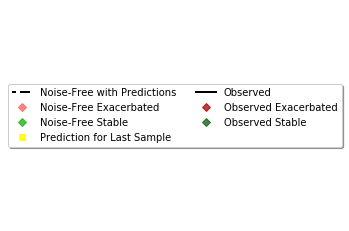

In [162]:
#create a legend for leave-one-out plots with predictions and save to a separate file using dummy plots
fig = plt.figure()
fig.patch.set_alpha(0.0)
ax = fig.add_subplot()
ax.plot([], [], linewidth=2, c='black',dashes=[2, 2,5,2], label="Noise-Free with Predictions")
ax.plot([], [], 'gD', color=l_red,alpha=0.75,label="Noise-Free Exacerbated")
ax.plot([], [], 'gD', color=l_green,alpha=0.75,label="Noise-Free Stable")
ax.plot([], [], 'gs', color='yellow',alpha=0.9, label="Prediction for Last Sample")
ax.plot([], [], linewidth=2, c='black', label="Observed")
ax.plot([], [], 'gD', color=d_red,alpha=0.75,label="Observed Exacerbated")
ax.plot([], [], 'gD', color=d_green,alpha=0.75,label="Observed Stable")
ax.legend(loc='center', shadow=True, ncol=2)
plt.gca().set_axis_off()
plt.savefig(r"F:\CF\Data\GPMicrobiome Data\Legendb_with_Pred.png", format='png')
plt.show()

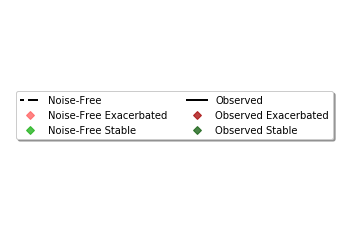

In [30]:
#create a legend for plots without predictions and save to a separate file using dummy plots
#you may already have this legend saved from the program Plotsamples_Functions_Loops, in which case you can skip this
fig = plt.figure()
fig.patch.set_alpha(0.0)
ax = fig.add_subplot()
ax.plot([], [], linewidth=2, c='black',dashes=[2, 2,5,2], label="Noise-Free")
ax.plot([], [], 'gD', color=l_red,alpha=0.75,label="Noise-Free Exacerbated")
ax.plot([], [], 'gD', color=l_green,alpha=0.75,label="Noise-Free Stable")
ax.plot([], [], linewidth=2, c='black', label="Observed")
ax.plot([], [], 'gD', color=d_red,alpha=0.75,label="Observed Exacerbated")
ax.plot([], [], 'gD', color=d_green,alpha=0.75,label="Observed Stable")
ax.legend(loc='center', shadow=True, ncol=2)
plt.gca().set_axis_off()
plt.savefig(r"F:\CF\Data\GPMicrobiome Data\Basic_Legend.png", format='png')
plt.show()

In [ ]:
#code to paste into the functions at the indicated places - legends for plots with predictions
#it is written to place the legend outside the plot, where it won't interfere
#you may wish to change the position of the legend box or make other adjustments to the figsize, or make other edits
#it is created using dummy plots with the same features as our actual plots
ax.plot([], [], linewidth=2, c='black',dashes=[2, 2,5,2], label="Noise-Free with Predictions")
ax.plot([], [], 'gD', color=l_red,alpha=0.75,label="Noise-Free Exacerbated")
ax.plot([], [], 'gD', color=l_green,alpha=0.75,label="Noise-Free Stable")
ax.plot([], [], 'gs', color='yellow',alpha=0.9, label="Prediction for Last Sample")
ax.plot([], [], linewidth=2, c='black', label="Observed")
ax.plot([], [], 'gD', color=d_red,alpha=0.75,label="Observed Exacerbated")
ax.plot([], [], 'gD', color=d_green,alpha=0.75,label="Observed Stable")
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
#the tuple (1.25, 0.8) refers to the position relative to the width and height of the plot
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=2)


In [ ]:
#code to paste into the functions at the indicated places - legends for plots without predictions
#it is written to place the legend outside the plot, where it won't interfere
#you may wish to change the position of the legend box or make other adjustments to the figsize, or make other edits
#it is created using dummy plots with the same features as our actual plots
ax.plot([], [], linewidth=2, c='black',dashes=[2, 2,5,2], label="Noise-Free")
ax.plot([], [], 'gD', color=l_red,alpha=0.75,label="Noise-Free Exacerbated")
ax.plot([], [], 'gD', color=l_green,alpha=0.75,label="Noise-Free Stable")
ax.plot([], [], linewidth=2, c='black', label="Observed")
ax.plot([], [], 'gD', color=d_red,alpha=0.75,label="Observed Exacerbated")
ax.plot([], [], 'gD', color=d_green,alpha=0.75,label="Observed Stable")
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
#the tuple (1.25, 0.8) refers to the position relative to the width and height of the plot
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=2)